In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [207]:
train['Test 1'] = train['Test 1'].replace(np.nan,-99)
train['Test 2'] = train['Test 2'].replace(np.nan,-99)
train['Test 3'] = train['Test 3'].replace(np.nan,-99)
train['Test 4'] = train['Test 4'].replace(np.nan,-99)
train['Test 5'] = train['Test 5'].replace(np.nan,-99)
train['Patient Age'].fillna(train['Patient Age'].mode()[0],inplace = True)
train["Mother's age"].fillna(train["Mother's age"].mode()[0],inplace = True)
train["Father's age"].fillna(train["Father's age"].mode()[0],inplace = True)
train['No. of previous abortion'].fillna(train['No. of previous abortion'].mode()[0],inplace = True)
train['Symptom 1'].fillna(train['Symptom 1'].mode()[0],inplace = True)
train['Symptom 2'].fillna(train['Symptom 2'].mode()[0],inplace = True)
train['Symptom 3'].fillna(train['Symptom 3'].mode()[0],inplace = True)
train['Symptom 4'].fillna(train['Symptom 4'].mode()[0],inplace = True)
train['Symptom 5'].fillna(train['Symptom 5'].mode()[0],inplace = True)
train['White Blood cell count (thousand per microliter)'].fillna(train['White Blood cell count (thousand per microliter)'].mode()[0],inplace = True)

train.drop(['Patient Id','Patient First Name' ,'Family Name',"Father's name",'Institute Name','Location of Institute'],axis=1,inplace=True)

train.dropna(axis=0, subset=['Disorder Subclass','Genetic Disorder'],inplace=True)
train['Inherited from father'].fillna(train['Inherited from father'].mode()[0],inplace = True)
train['Maternal gene'].fillna(train['Maternal gene'].mode()[0],inplace = True)
train['Respiratory Rate (breaths/min)'].fillna(train['Respiratory Rate (breaths/min)'].mode()[0],inplace = True)
train['Heart Rate (rates/min'].fillna(train['Heart Rate (rates/min'].mode()[0],inplace = True)
train['Follow-up'].fillna(train['Follow-up'].mode()[0],inplace = True)
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Place of birth'].fillna(train['Place of birth'].mode()[0],inplace = True)
train['Folic acid details (peri-conceptional)'].fillna(train['Folic acid details (peri-conceptional)'].mode()[0],inplace = True)
train['H/O serious maternal illness'].fillna(train['H/O serious maternal illness'].mode()[0],inplace = True)
train['Assisted conception IVF/ART'].fillna(train['Assisted conception IVF/ART'].mode()[0],inplace = True)
train['History of anomalies in previous pregnancies'].fillna(train['History of anomalies in previous pregnancies'].mode()[0],inplace = True)
train['Birth defects'].fillna(train['Birth defects'].mode()[0],inplace = True)
train['Blood test result'].fillna(train['Blood test result'].mode()[0],inplace = True)

train['Parental consent'] = train['Parental consent'].replace(np.nan,'No')


train['Birth asphyxia'] = train['Birth asphyxia'].replace(np.nan,'Not available')
train['Autopsy shows birth defect (if applicable)'] = train['Autopsy shows birth defect (if applicable)'].replace({np.nan:'Not applicable','None':'Not applicable'})
train['H/O radiation exposure (x-ray)'] = train['H/O radiation exposure (x-ray)'].replace({np.nan:'Not applicable','-':'Not applicable'})
train['H/O substance abuse'] = train['H/O substance abuse'].replace({np.nan:'Not applicable','-':'Not applicable'})

In [208]:
train.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,23.0,20.0,Alive,Normal (30-60),...,Multiple,9.857562,slightly abnormal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,3.000000,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,20.0,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,Yes,Yes,4.720703,32.0,20.0,Alive,Tachypnea,...,Multiple,4.098210,slightly abnormal,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer
5,14.0,Yes,No,Yes,No,5.103188,23.0,20.0,Deceased,Normal (30-60),...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis


In [209]:
train['Genetic Disorder'].value_counts()

Mitochondrial genetic inheritance disorders     9241
Single-gene inheritance diseases                6929
Multifactorial genetic inheritance disorders    1877
Name: Genetic Disorder, dtype: int64

In [210]:
train['Disorder Subclass'].value_counts()

Leigh syndrome                         4683
Mitochondrial myopathy                 3971
Cystic fibrosis                        3145
Tay-Sachs                              2556
Diabetes                               1653
Hemochromatosis                        1228
Leber's hereditary optic neuropathy     587
Alzheimer's                             133
Cancer                                   91
Name: Disorder Subclass, dtype: int64

In [211]:
categorical_features = [ f for f in train.columns if train[f].dtypes == 'O' and f not in ['Genetic Disorder', 'Disorder Subclass']]

In [212]:
categorical_features

["Genes in mother's side",
 'Inherited from father',
 'Maternal gene',
 'Paternal gene',
 'Status',
 'Respiratory Rate (breaths/min)',
 'Heart Rate (rates/min',
 'Parental consent',
 'Follow-up',
 'Gender',
 'Birth asphyxia',
 'Autopsy shows birth defect (if applicable)',
 'Place of birth',
 'Folic acid details (peri-conceptional)',
 'H/O serious maternal illness',
 'H/O radiation exposure (x-ray)',
 'H/O substance abuse',
 'Assisted conception IVF/ART',
 'History of anomalies in previous pregnancies',
 'Birth defects',
 'Blood test result']

In [213]:
from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [214]:
a = MultiColumnLabelEncoder(columns = categorical_features).fit_transform(train)

In [215]:
a.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,1,0,1,0,4.760603,23.0,20.0,0,0,...,0,9.857562,3,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
2,6.0,1,0,0,0,4.893297,41.0,22.0,0,0,...,1,3.000000,2,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,1,0,1,0,4.705280,21.0,20.0,1,1,...,1,7.919321,1,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,1,0,1,1,4.720703,32.0,20.0,0,1,...,0,4.098210,3,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer
5,14.0,1,0,1,0,5.103188,23.0,20.0,1,0,...,0,10.272230,2,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis


In [216]:
train_independent = a.drop(['Genetic Disorder','Disorder Subclass'],axis=1) 

#train_independent = pd.get_dummies(train_independent,drop_first = True)

X = train_independent
y = a['Genetic Disorder']


In [217]:
X.shape , y.shape

((18047, 37), (18047,))

In [218]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X, y)

In [219]:
y_over.value_counts()

Multifactorial genetic inheritance disorders    9241
Mitochondrial genetic inheritance disorders     9241
Single-gene inheritance diseases                9241
Name: Genetic Disorder, dtype: int64

In [220]:
X_over.shape

(27723, 37)

In [221]:
a['Genetic Disorder'].value_counts()

Mitochondrial genetic inheritance disorders     9241
Single-gene inheritance diseases                6929
Multifactorial genetic inheritance disorders    1877
Name: Genetic Disorder, dtype: int64

##### NOw it is balanced dataset ____ after performing oversampling

In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=5)

from sklearn.preprocessing import StandardScaler
sm = StandardScaler()
X_train_scaled = sm.fit_transform(X_train)
X_test_scaled = sm.transform(X_test)

from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train_scaled,y_train)
y_pred = lm.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred))


from sklearn.metrics import accuracy_score
print("accuracy is: " ,accuracy_score(y_test,y_pred))

                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.55      0.38      0.45      2795
Multifactorial genetic inheritance disorders       0.63      0.83      0.71      2727
            Single-gene inheritance diseases       0.45      0.44      0.45      2795

                                    accuracy                           0.55      8317
                                   macro avg       0.54      0.55      0.54      8317
                                weighted avg       0.54      0.55      0.54      8317

[[1066  448 1281]
 [ 220 2261  246]
 [ 651  901 1243]]
accuracy is:  0.5494769748707466


In [223]:
X_train_scaled

array([[-1.60033636,  0.76278367,  1.15955564, ...,  0.75309263,
         0.96028505,  0.99516781],
       [-1.12941438,  0.76278367, -0.86239932, ...,  0.75309263,
         0.96028505,  0.99516781],
       [ 0.98973454, -1.31098768, -0.86239932, ..., -1.3278579 ,
        -1.04135746, -1.00485565],
       ...,
       [-0.6584924 ,  0.76278367, -0.86239932, ...,  0.75309263,
         0.96028505, -1.00485565],
       [-1.60033636, -1.31098768,  1.15955564, ...,  0.75309263,
         0.96028505,  0.99516781],
       [ 1.22519553,  0.76278367,  1.15955564, ...,  0.75309263,
        -1.04135746,  0.99516781]])

In [224]:
from sklearn.tree import DecisionTreeClassifier
ex_decision = DecisionTreeClassifier()
ex_decision.fit(X_train_scaled,y_train)
y_pred = ex_decision.predict(X_test_scaled)
print(ex_decision.score(X_train_scaled,y_train))
                

print(metrics.confusion_matrix(y_test,y_pred))
                        

print(metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

1.0
[[1585  218  992]
 [  38 2655   34]
 [ 849  220 1726]]
0.7173259588794036
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.64      0.57      0.60      2795
Multifactorial genetic inheritance disorders       0.86      0.97      0.91      2727
            Single-gene inheritance diseases       0.63      0.62      0.62      2795

                                    accuracy                           0.72      8317
                                   macro avg       0.71      0.72      0.71      8317
                                weighted avg       0.71      0.72      0.71      8317



In [225]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train_scaled, y_train)
y_pred2 = model2.predict(X_test_scaled)
print(model2.score(X_train_scaled,y_train))
                

print(metrics.confusion_matrix(y_test,y_pred2))
                        

print(metrics.accuracy_score(y_test,y_pred2))
print(metrics.classification_report(y_test, y_pred2))

1.0
[[2102  170  523]
 [  19 2682   26]
 [ 904  227 1664]]
0.7752795479139113
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.69      0.75      0.72      2795
Multifactorial genetic inheritance disorders       0.87      0.98      0.92      2727
            Single-gene inheritance diseases       0.75      0.60      0.66      2795

                                    accuracy                           0.78      8317
                                   macro avg       0.77      0.78      0.77      8317
                                weighted avg       0.77      0.78      0.77      8317



In [226]:
import xgboost as xgb
model5 = xgb.XGBClassifier()
model5.fit(X_train_scaled, y_train)
y_pred5 = model5.predict(X_test_scaled)
print(model5.score(X_train_scaled,y_train))
print(metrics.confusion_matrix(y_test,y_pred5))
print(metrics.accuracy_score(y_test,y_pred5))
print(metrics.classification_report(y_test, y_pred5))

0.9226012573430897
[[1708  229  858]
 [  60 2621   46]
 [ 872  329 1594]]
0.712155825417819
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.65      0.61      0.63      2795
Multifactorial genetic inheritance disorders       0.82      0.96      0.89      2727
            Single-gene inheritance diseases       0.64      0.57      0.60      2795

                                    accuracy                           0.71      8317
                                   macro avg       0.70      0.71      0.71      8317
                                weighted avg       0.70      0.71      0.70      8317



################ Hyper parameter tuning #######################

In [18]:
from sklearn.model_selection import RandomizedSearchCV
RF = RandomForestClassifier()
paramgrid = { 'n_estimators': [50,80,100,120,140,150,180,200],
    'criterion':['gini','entropy'],
    'max_depth':[3,5,8,10]}
random = RandomizedSearchCV(RF, paramgrid, random_state=0 )
RF_clf = random.fit(X_train_scaled,y_train)

In [19]:
print(RF_clf.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=150)


In [20]:
model2_best = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=150)
model2_best.fit(X_train_scaled, y_train)
y_pred2 = model2_best.predict(X_test_scaled)
print(model2_best.score(X_train_scaled,y_train))
                

print(metrics.confusion_matrix(y_test,y_pred2))
                        

print(metrics.accuracy_score(y_test,y_pred2))
print(metrics.classification_report(y_test, y_pred2))

0.8426259919612491
[[2015  339  441]
 [ 101 2543   83]
 [ 864  691 1240]]
0.6971263676806541
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.68      0.72      0.70      2795
Multifactorial genetic inheritance disorders       0.71      0.93      0.81      2727
            Single-gene inheritance diseases       0.70      0.44      0.54      2795

                                    accuracy                           0.70      8317
                                   macro avg       0.70      0.70      0.68      8317
                                weighted avg       0.70      0.70      0.68      8317



In [21]:
######################## Decision Tree 

In [23]:
path = ex_decision.cost_complexity_pruning_path(X_train_scaled, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [24]:

ccp_alphas

array([0.00000000e+00, 3.27921074e-05, 3.86478409e-05, ...,
       9.59119268e-03, 2.02425609e-02, 3.67147392e-02])

In [25]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_scaled, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.03671473916658541


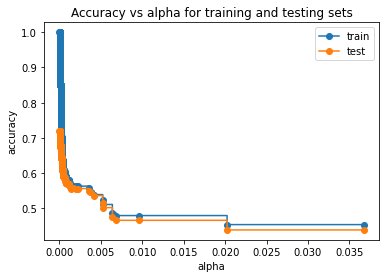

In [26]:
train_scores = [clf.score(X_train_scaled, y_train) for clf in clfs]
test_scores = [clf.score(X_test_scaled, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [28]:
ex_decision = DecisionTreeClassifier(random_state=0, ccp_alpha=0)
ex_decision.fit(X_train_scaled,y_train)
y_pred = ex_decision.predict(X_test_scaled)
print(ex_decision.score(X_train_scaled,y_train))
                

print(metrics.confusion_matrix(y_test,y_pred))
                        

print(metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

1.0
[[1541  231 1023]
 [  30 2664   33]
 [ 774  242 1779]]
0.7194902007935554
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.66      0.55      0.60      2795
Multifactorial genetic inheritance disorders       0.85      0.98      0.91      2727
            Single-gene inheritance diseases       0.63      0.64      0.63      2795

                                    accuracy                           0.72      8317
                                   macro avg       0.71      0.72      0.71      8317
                                weighted avg       0.71      0.72      0.71      8317



In [30]:
########### Note - for target 1 - random forest is performing better 

In [227]:
X_target2 = train_independent
y_target2 = a['Disorder Subclass']

In [228]:
X_target2.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,2.0,1,0,1,0,4.760603,23.0,20.0,0,0,...,1,2.0,0,9.857562,3,1.0,1.0,1.0,1.0,1.0
2,6.0,1,0,0,0,4.893297,41.0,22.0,0,0,...,1,4.0,1,3.000000,2,0.0,1.0,1.0,1.0,1.0
3,12.0,1,0,1,0,4.705280,21.0,20.0,1,1,...,1,1.0,1,7.919321,1,0.0,0.0,1.0,0.0,0.0
4,11.0,1,0,1,1,4.720703,32.0,20.0,0,1,...,0,4.0,0,4.098210,3,0.0,0.0,0.0,0.0,0.0
5,14.0,1,0,1,0,5.103188,23.0,20.0,1,0,...,0,0.0,0,10.272230,2,1.0,0.0,0.0,1.0,0.0


In [229]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='not majority',random_state = 42)
X_over, y_over = oversample.fit_resample(X_target2, y_target2)


In [230]:
y_over.value_counts()

Mitochondrial myopathy                 4683
Leber's hereditary optic neuropathy    4683
Diabetes                               4683
Leigh syndrome                         4683
Cystic fibrosis                        4683
Alzheimer's                            4683
Cancer                                 4683
Hemochromatosis                        4683
Tay-Sachs                              4683
Name: Disorder Subclass, dtype: int64

In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=5)

from sklearn.preprocessing import StandardScaler
sm = StandardScaler()
X_train_scaled = sm.fit_transform(X_train)
X_test_scaled = sm.transform(X_test)

from sklearn.linear_model import LogisticRegression
lm_target2 = LogisticRegression()
lm_target2.fit(X_train_scaled,y_train)
y_pred = lm_target2.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred))


from sklearn.metrics import accuracy_score
print("accuracy is: " ,accuracy_score(y_test,y_pred))

                                     precision    recall  f1-score   support

                        Alzheimer's       0.51      0.67      0.58      1377
                             Cancer       0.71      0.82      0.76      1367
                    Cystic fibrosis       0.35      0.37      0.36      1366
                           Diabetes       0.37      0.27      0.31      1441
                    Hemochromatosis       0.43      0.45      0.44      1424
Leber's hereditary optic neuropathy       0.37      0.31      0.34      1420
                     Leigh syndrome       0.36      0.38      0.37      1410
             Mitochondrial myopathy       0.33      0.31      0.32      1394
                          Tay-Sachs       0.33      0.29      0.31      1446

                           accuracy                           0.43     12645
                          macro avg       0.42      0.43      0.42     12645
                       weighted avg       0.42      0.43      0.42     126

In [232]:
from sklearn.tree import DecisionTreeClassifier
ex_decision_target2 = DecisionTreeClassifier()
ex_decision_target2.fit(X_train_scaled,y_train)
y_pred = ex_decision_target2.predict(X_test_scaled)
print(ex_decision_target2.score(X_train_scaled,y_train))
                

print(metrics.confusion_matrix(y_test,y_pred))
                        


print(metrics.classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test,y_pred))

1.0
[[1377    0    0    0    0    0    0    0    0]
 [   0 1367    0    0    0    0    0    0    0]
 [  10    0  888  151    7   64  146   57   43]
 [  10    0   67 1269    0   43   34   13    5]
 [   0    0    0    0 1353    0   14   20   37]
 [   0    0    0    0    0 1420    0    0    0]
 [   5    5  246   84   66   22  439  341  202]
 [   0    2   94   37  113    8  291  598  251]
 [   1    4   27    8   94    1  108  181 1022]]
                                     precision    recall  f1-score   support

                        Alzheimer's       0.98      1.00      0.99      1377
                             Cancer       0.99      1.00      1.00      1367
                    Cystic fibrosis       0.67      0.65      0.66      1366
                           Diabetes       0.82      0.88      0.85      1441
                    Hemochromatosis       0.83      0.95      0.89      1424
Leber's hereditary optic neuropathy       0.91      1.00      0.95      1420
                     Le

In [233]:
from sklearn.ensemble import RandomForestClassifier
model2_target2 = RandomForestClassifier()
model2_target2.fit(X_train_scaled, y_train)
y_pred2 = model2_target2.predict(X_test_scaled)
print(model2_target2.score(X_train_scaled,y_train))
                

print(metrics.confusion_matrix(y_test,y_pred2))
                        

print(metrics.accuracy_score(y_test,y_pred2))
print(metrics.classification_report(y_test, y_pred2))

1.0
[[1377    0    0    0    0    0    0    0    0]
 [   0 1367    0    0    0    0    0    0    0]
 [   0    0  992  150    0   19  146   48   11]
 [   1    0   89 1300    0   12   37    1    1]
 [   0    0    0    0 1355    0   13   25   31]
 [   0    0    0    0    0 1420    0    0    0]
 [   0    0  268   40   25    0  582  355  140]
 [   0    0   70    6   74    0  343  671  230]
 [   0    0    9    0  100    0  101  195 1041]]
0.7991300909450376
                                     precision    recall  f1-score   support

                        Alzheimer's       1.00      1.00      1.00      1377
                             Cancer       1.00      1.00      1.00      1367
                    Cystic fibrosis       0.69      0.73      0.71      1366
                           Diabetes       0.87      0.90      0.89      1441
                    Hemochromatosis       0.87      0.95      0.91      1424
Leber's hereditary optic neuropathy       0.98      1.00      0.99      1420
    

In [234]:
import xgboost as xgb
model5_target2 = xgb.XGBClassifier()
model5_target2.fit(X_train_scaled, y_train)
y_pred5 = model5_target2.predict(X_test_scaled)
print(model5_target2.score(X_train_scaled,y_train))
print(metrics.confusion_matrix(y_test,y_pred5))
print(metrics.accuracy_score(y_test,y_pred5))
print(metrics.classification_report(y_test, y_pred5))

0.9678326893091994
[[1377    0    0    0    0    0    0    0    0]
 [   0 1367    0    0    0    0    0    0    0]
 [   1    0  917  162    4   61  149   60   12]
 [   3    0  101 1260    1   37   31    7    1]
 [   0    1    5    0 1343    0   16   23   36]
 [   0    0    0    0    0 1420    0    0    0]
 [   0    1  234   65   49   10  518  349  184]
 [   0    0   61   19  106    2  342  612  252]
 [   0    4   21    3  120    0  102  188 1008]]
0.7767497034400949
                                     precision    recall  f1-score   support

                        Alzheimer's       1.00      1.00      1.00      1377
                             Cancer       1.00      1.00      1.00      1367
                    Cystic fibrosis       0.68      0.67      0.68      1366
                           Diabetes       0.83      0.87      0.85      1441
                    Hemochromatosis       0.83      0.94      0.88      1424
Leber's hereditary optic neuropathy       0.93      1.00      0.96

In [195]:
test.shape

(9465, 43)

In [196]:
test.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99,Multiple,6.195178,normal,True,True,True,True,False


In [197]:
test.isnull().sum()

Patient Id                                             0
Patient Age                                            0
Genes in mother's side                                 0
Inherited from father                                551
Maternal gene                                       3723
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9317
Father's name                                          0
Mother's age                                           0
Father's age                                           0
Institute Name                                      2036
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2886
Heart Rate (rates/min                               2900
Test 1                         

In [262]:
test.drop(['Patient Id','Patient First Name' ,'Family Name',"Father's name",'Institute Name','Location of Institute'],axis=1,inplace=True)
test['Inherited from father'].fillna(test['Inherited from father'].mode()[0],inplace = True)
test['Maternal gene'].fillna(test['Maternal gene'].mode()[0],inplace = True)
test['Respiratory Rate (breaths/min)'].fillna(test['Respiratory Rate (breaths/min)'].mode()[0],inplace = True)
test['Heart Rate (rates/min'].fillna(test['Heart Rate (rates/min'].mode()[0],inplace = True)


In [236]:
test.shape

(9465, 37)

In [237]:
X_train_scaled.shape

(29502, 37)

In [238]:
test.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Test 1',
       'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Parental consent', 'Follow-up',
       'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5'],
      dtype='object')

In [239]:
test.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,6,No,Yes,No,No,4.981655,38,61,Alive,Tachypnea,...,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,10,Yes,No,Yes,Yes,5.118890,33,53,Alive,Normal (30-60),...,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,5,No,No,No,No,4.876204,48,60,Deceased,Normal (30-60),...,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,13,No,Yes,Yes,No,4.687767,25,55,Alive,-99,...,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,5,No,No,Yes,Yes,5.152362,41,38,Deceased,Tachypnea,...,No,-99,Multiple,6.195178,normal,True,True,True,True,False


In [263]:
categorical_features1 = [ f for f in test.columns if test[f].dtypes == 'O']

In [264]:
categorical_features1

["Genes in mother's side",
 'Inherited from father',
 'Maternal gene',
 'Paternal gene',
 'Status',
 'Respiratory Rate (breaths/min)',
 'Heart Rate (rates/min',
 'Parental consent',
 'Follow-up',
 'Gender',
 'Birth asphyxia',
 'Autopsy shows birth defect (if applicable)',
 'Place of birth',
 'Folic acid details (peri-conceptional)',
 'H/O serious maternal illness',
 'H/O radiation exposure (x-ray)',
 'H/O substance abuse',
 'Assisted conception IVF/ART',
 'History of anomalies in previous pregnancies',
 'Birth defects',
 'Blood test result']

In [265]:
c1 = ["Genes in mother's side",
 'Inherited from father',
 'Maternal gene',
 'Paternal gene',
 'Status',
 'Respiratory Rate (breaths/min)',
 'Heart Rate (rates/min',
 'Parental consent',
 'Follow-up',
 'Gender',
 'Birth asphyxia',
 'Autopsy shows birth defect (if applicable)',
 'Place of birth',
 'Folic acid details (peri-conceptional)',
 'H/O serious maternal illness',
 'H/O radiation exposure (x-ray)',
 'H/O substance abuse',
 'Assisted conception IVF/ART',
 'History of anomalies in previous pregnancies',
 'Birth defects',
 'Blood test result','Symptom 1','Symptom 2','Symptom 3','Symptom 4','Symptom 5']

In [266]:
b1 =  MultiColumnLabelEncoder(columns = c1).fit_transform(test)

In [267]:
b1.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,6,0,1,0,0,4.981655,38,61,0,2,...,0,2,1,-99.000000,4,1,1,1,1,1
1,10,1,0,1,1,5.118890,33,53,0,1,...,2,-99,1,8.179584,3,0,0,0,1,0
2,5,0,0,0,0,4.876204,48,60,1,1,...,1,0,2,-99.000000,4,0,0,1,1,0
3,13,0,1,1,0,4.687767,25,55,0,0,...,2,-99,2,6.884071,3,1,0,1,0,1
4,5,0,0,1,1,5.152362,41,38,1,2,...,1,-99,1,6.195178,3,1,1,1,1,0


In [268]:
################ b1 is test data

In [269]:
b1_pred_target1 = model2.predict(b1)

In [274]:
b1_pred_target1

array(['Multifactorial genetic inheritance disorders',
       'Multifactorial genetic inheritance disorders',
       'Multifactorial genetic inheritance disorders', ...,
       'Multifactorial genetic inheritance disorders',
       'Multifactorial genetic inheritance disorders',
       'Multifactorial genetic inheritance disorders'], dtype=object)

In [275]:
b1_pred_target2 = model2_target2.predict(b1)

In [276]:
b1_pred_target2

array(['Diabetes', 'Cystic fibrosis', 'Cystic fibrosis', ..., 'Diabetes',
       'Diabetes', 'Diabetes'], dtype=object)

In [277]:
test.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,6,No,Yes,No,No,4.981655,38,61,Alive,Tachypnea,...,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,10,Yes,No,Yes,Yes,5.118890,33,53,Alive,Normal (30-60),...,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,5,No,No,No,No,4.876204,48,60,Deceased,Normal (30-60),...,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,13,No,Yes,Yes,No,4.687767,25,55,Alive,-99,...,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,5,No,No,Yes,Yes,5.152362,41,38,Deceased,Tachypnea,...,No,-99,Multiple,6.195178,normal,True,True,True,True,False


In [278]:
test1 = pd.read_csv('test.csv')

In [282]:
df1 = pd.concat([test1['Patient Id'],b1_pred_target1,b1_pred_target2],axis=1)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [291]:
df11 = pd.DataFrame(b1_pred_target1,columns =['Genetic Disorder'])

In [293]:
df11

,Genetic Disorder
0,Multifactorial genetic inheritance disorders
1,Multifactorial genetic inheritance disorders
2,Multifactorial genetic inheritance disorders
3,Multifactorial genetic inheritance disorders
4,Multifactorial genetic inheritance disorders
...,...
9460,Multifactorial genetic inheritance disorders
9461,Multifactorial genetic inheritance disorders
9462,Multifactorial genetic inheritance disorders
9463,Multifactorial genetic inheritance disorders


In [294]:
df12 = pd.DataFrame(b1_pred_target2,columns =['Disorder Subclass'])

In [295]:
df12

,Disorder Subclass
0,Diabetes
1,Cystic fibrosis
2,Cystic fibrosis
3,Cystic fibrosis
4,Cystic fibrosis
...,...
9460,Diabetes
9461,Cystic fibrosis
9462,Diabetes
9463,Diabetes


In [298]:
df13 = pd.DataFrame(test1['Patient Id'],columns=['Patient Id'])

In [299]:
df13

,Patient Id
0,PID0x4175
1,PID0x21f5
2,PID0x49b8
3,PID0x2d97
4,PID0x58da
...,...
9460,PID0x81e1
9461,PID0x3514
9462,PID0x5408
9463,PID0x2017


In [302]:
df_final1 = pd.concat([df13,df11,df12],axis=1)

In [303]:
df_final1

,Patient Id,Genetic Disorder,Disorder Subclass
0,PID0x4175,Multifactorial genetic inheritance disorders,Diabetes
1,PID0x21f5,Multifactorial genetic inheritance disorders,Cystic fibrosis
2,PID0x49b8,Multifactorial genetic inheritance disorders,Cystic fibrosis
3,PID0x2d97,Multifactorial genetic inheritance disorders,Cystic fibrosis
4,PID0x58da,Multifactorial genetic inheritance disorders,Cystic fibrosis
...,...,...,...
9460,PID0x81e1,Multifactorial genetic inheritance disorders,Diabetes
9461,PID0x3514,Multifactorial genetic inheritance disorders,Cystic fibrosis
9462,PID0x5408,Multifactorial genetic inheritance disorders,Diabetes
9463,PID0x2017,Multifactorial genetic inheritance disorders,Diabetes


In [304]:
df_final1['Genetic Disorder'].value_counts()

Multifactorial genetic inheritance disorders    6531
Single-gene inheritance diseases                2508
Mitochondrial genetic inheritance disorders      426
Name: Genetic Disorder, dtype: int64

In [305]:
df_final1['Disorder Subclass'].value_counts()

Diabetes                               4595
Cystic fibrosis                        2663
Leigh syndrome                         1429
Leber's hereditary optic neuropathy     324
Alzheimer's                             229
Mitochondrial myopathy                  222
Tay-Sachs                                 3
Name: Disorder Subclass, dtype: int64

In [306]:
df_final1.to_csv('final_file.csv')